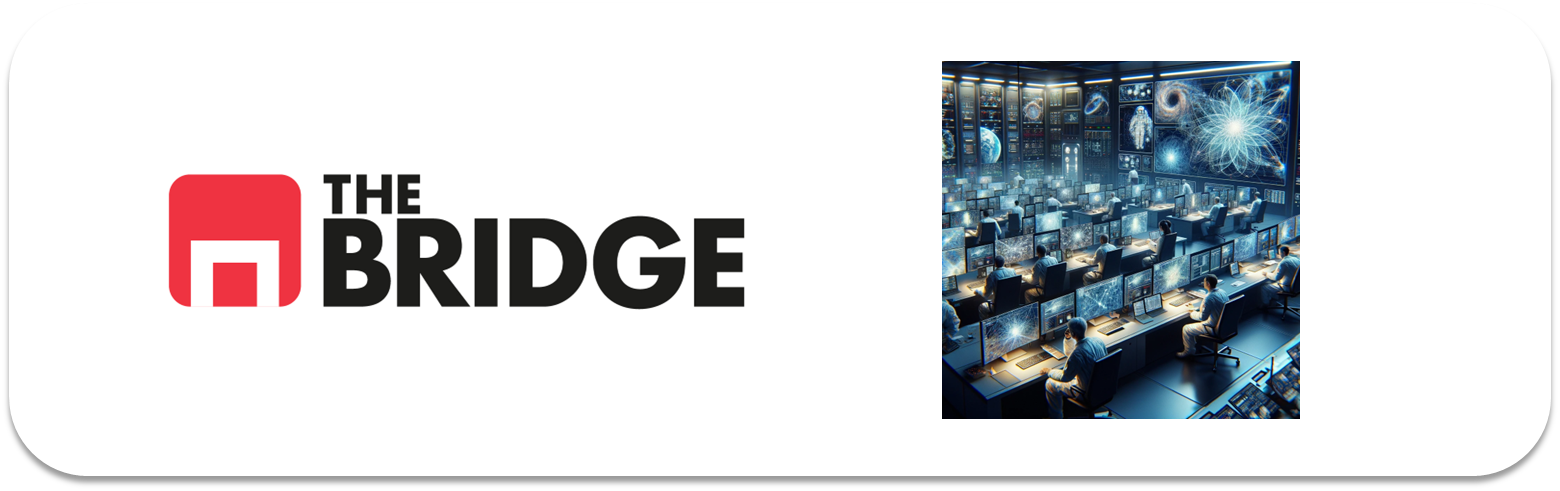

## PRACTICA OBLIGATORIA: **Transfer Learning y Fine Tuning**

* La práctica obligatoria de esta unidad consiste en un repetir el ejercicio de construcción de un modelo de clasificación de paisajes pero usando un modelo preentrenado. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle
from skimage.io import imread
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from keras.optimizers import Adam
import cv2
from sklearn.preprocessing import LabelEncoder


### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

6. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.



In [2]:
ROOT_PATH = '../../Unidad_01/data/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"

In [3]:
def read_data(directorio, reshape_dim = (32,32)):
    X = [] 
    y = []
    for folder in os.listdir(directorio):
        print(folder)
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(folder)

    return np.array(X),np.array(y)

In [4]:
"""Función para la visualización de imágenes en un batch"""
def show_images_batch(paisajes, names = [], n_cols = 5, size_scale = 2):
    n_rows = ((len(paisajes) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, paisaje in enumerate(paisajes):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(paisaje, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

In [5]:
X_train, y_train = read_data(TRAIN_PATH)
X_test, y_test = read_data(TEST_PATH)

buildings
forest
glacier
mountain
sea
street
buildings
forest
glacier
mountain
sea
street


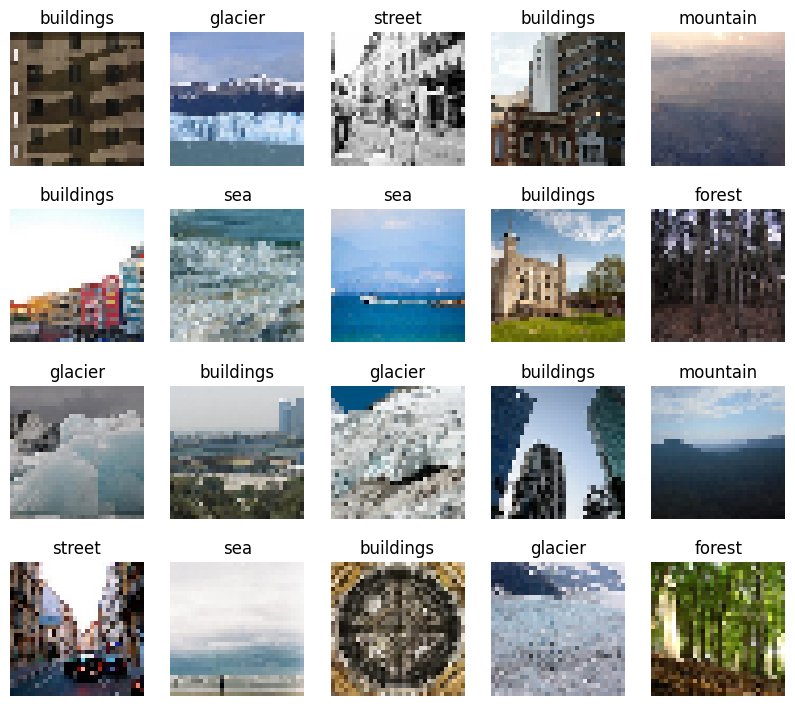

In [6]:
indices = np.random.randint(0,len(X_train),20)
show_images_batch(X_train[indices], names = y_train[indices], n_cols = 5)

In [7]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("\n")
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (14034, 32, 32, 3)
y_train shape:  (14034,)


X_test shape:  (3000, 32, 32, 3)
y_test shape:  (3000,)


Los datos son imágenes de 32 x 32 con 3 canales (a color). El set de train cuenta con un total de 14034 imágenes y el set de test cuenta con un total de 3000 imágenes.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 30)     │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │       144,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,109 (621.52 KB)

 Trainable params: 159,109 (621.52 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5049 - loss: 1.2453 - val_accuracy: 0.6505 - val_loss: 0.9175
Epoch 2/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6604 - loss: 0.8820 - val_accuracy: 0.6747 - val_loss: 0.8421
Epoch 3/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7148 - loss: 0.7582 - val_accuracy: 0.7264 - val_loss: 0.7231
Epoch 4/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7478 - loss: 0.6855 - val_accuracy: 0.7396 - val_loss: 0.7246
Epoch 5/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7780 - loss: 0.6033 - val_accuracy: 0.7553 - val_loss: 0.6930
Epoch 6/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8006 - loss: 0.5411 - val_accuracy: 0.7663 - val_loss: 0.6519
Epoch 7/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8113 - loss: 0.5005 - val_accuracy: 0.7663 - val_loss: 0.6528
Epoch 8/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8328 - loss: 0.4567 - val

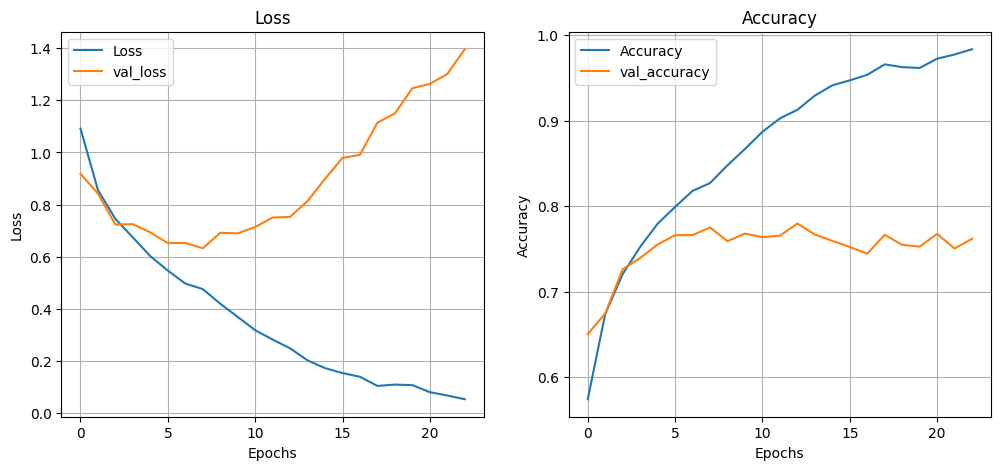

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7867 - loss: 0.6173
Test Loss: 0.6402 Test Accuracy: 0.7740
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       437
           1       0.93      0.87      0.90       474
           2       0.76      0.74      0.75       553
           3       0.78      0.75      0.76       525
           4       0.76      0.74      0.75       510
           5       0.74      0.83      0.78       501

    accuracy                           0.77      3000
   macro avg       0.78      0.77      0.77      3000
weighted avg       0.78      0.77      0.77      3000

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


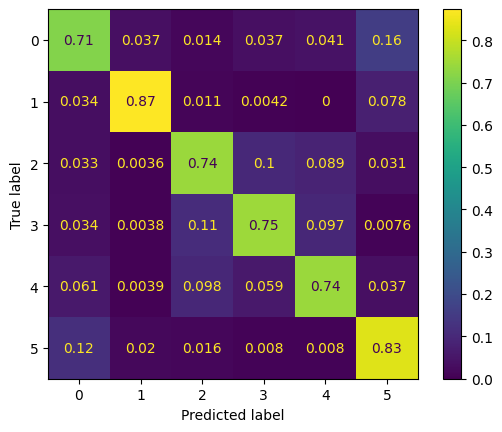

In [8]:
"""Normalizar los datos de entrada"""
X_train = X_train / 255
X_test = X_test / 255

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

"""Codificar las variables target"""
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_train_encoded = pd.Series(y_train_encoded)

y_test_encoded = encoder.transform(y_test)
y_test_encoded = pd.Series(y_test_encoded)

"""Desordenar los datos de entrada y salida"""
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train_encoded, random_state = 42)
X_test_shuffled, y_test_shuffled = shuffle(X_test, y_test_encoded, random_state = 42)



"""Modelo AD HOC"""
model = keras.Sequential([
    layers.Input(X_train[0].shape),

    layers.Conv2D(filters = 30, kernel_size = (3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 15, kernel_size = (3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D( pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(150, activation='relu'),
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(6, activation='softmax')
])

print(model.summary())

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 15, restore_best_weights = True)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_shuffled, y_train_shuffled, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks = es)

"""Resultados"""
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

loss, accuracy = model.evaluate(X_test_shuffled, y_test_shuffled)
print(f"Test Loss: {loss:.4f}", f"Test Accuracy: {accuracy:.4f}")

print(classification_report(y_test_shuffled, model.predict(X_test_shuffled).argmax(axis = 1)))
predictions = model.predict(X_test_shuffled)
predictions = predictions.argmax(axis = 1)
y_pred = predictions
ConfusionMatrixDisplay.from_predictions(y_test_shuffled, y_pred, normalize = 'true')

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

C:\Users\usuar\AppData\Local\Temp\ipykernel_15020\1184085690.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model_base = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights= 'imagenet', pooling='avg')


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,916,934 (11.13 MB)

 Trainable params: 658,950 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

None
Epoch 1/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.4252 - loss: 1.4708 - val_accuracy: 0.5112 - val_loss: 1.2347
Epoch 2/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.5027 - loss: 1.2376 - val_accuracy: 0.5126 - val_loss: 1.2127
Epoch 3/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.5337 - loss: 1.1854 - val_accuracy: 0.5205 - val_loss: 1.1988
Epoch 4/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.5482 - loss: 1.1476 - val_accuracy: 0.5223 - val_loss: 1.1850
Epoch 5/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.5491 - loss: 1.1407 - val_accuracy: 0.5290 - val_loss: 1.1847
Epoch 6/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.5599 - loss: 1.1133 - val_accuracy: 0.5273 - val_loss: 1.1776
Epoch 7/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.5720 - loss: 1.0986 - val_accuracy: 0.5330 - val_loss: 1.1764
Epoch 8/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.5757 - lo

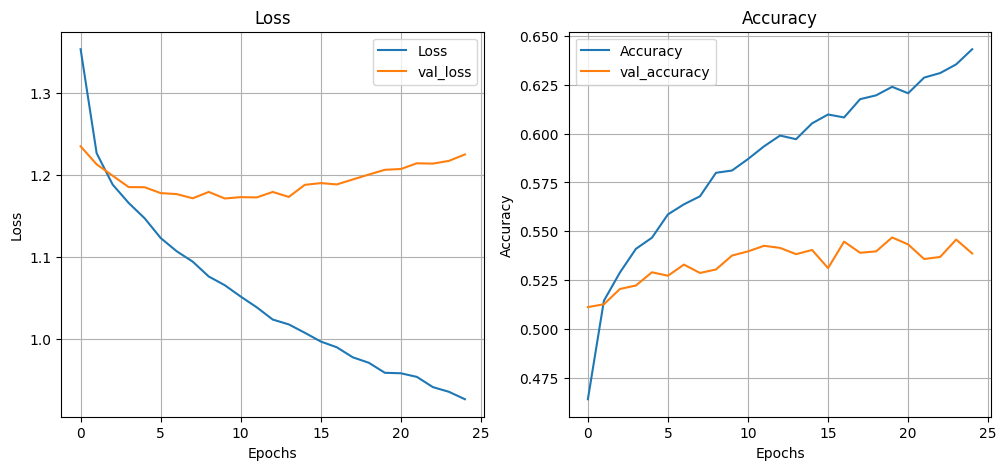

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5376 - loss: 1.1588
Test Loss: 1.1843 Test Accuracy: 0.5303
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step
              precision    recall  f1-score   support

           0       0.51      0.52      0.51       437
           1       0.75      0.83      0.79       474
           2       0.44      0.42      0.43       553
           3       0.47      0.51      0.48       525
           4       0.54      0.43      0.48       510
           5       0.48      0.51      0.50       501

    accuracy                           0.53      3000
   macro avg       0.53      0.54      0.53      3000
weighted avg       0.53      0.53      0.53      3000

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


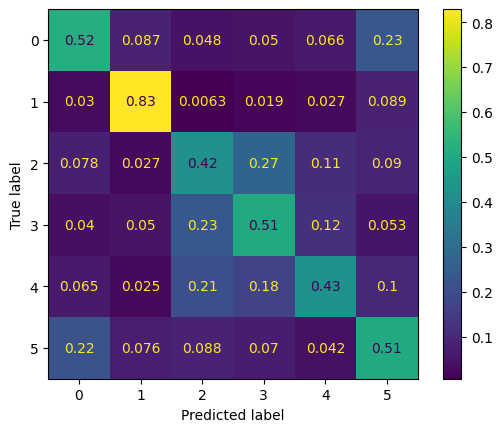

In [11]:
"""Modelo preentrenado haciendo transfer learning"""
from tensorflow.keras.applications import MobileNetV2

model_base = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights= 'imagenet', pooling='avg')
model_base.trainable = False

x = layers.Flatten()(model_base.output)
x = layers.Dense(512, activation='relu')(model_base.output)
x = layers.Dropout(0.5)(x)
x = layers.Dense(6, activation='softmax')(x)
model = keras.Model(inputs=model_base.input, outputs=x)

print(model.summary())

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_shuffled, y_train_shuffled, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks = es)

"""Resultados"""
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

loss, accuracy = model.evaluate(X_test_shuffled, y_test_shuffled)
print(f"Test Loss: {loss:.4f}", f"Test Accuracy: {accuracy:.4f}")

print(classification_report(y_test_shuffled, model.predict(X_test_shuffled).argmax(axis = 1)))
predictions = model.predict(X_test_shuffled)
predictions = predictions.argmax(axis = 1)
y_pred = predictions
ConfusionMatrixDisplay.from_predictions(y_test_shuffled, y_pred, normalize = 'true');

Este modelo no obtiene muy buenos resultados. Es como si fuese un clasificador aleatorio.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,916,934 (11.13 MB)

 Trainable params: 2,882,822 (11.00 MB)

 Non-trainable params: 34,112 (133.25 KB)

None
Epoch 1/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 78s 155ms/step - accuracy: 0.2642 - loss: 1.8909 - val_accuracy: 0.1532 - val_loss: 1.7921
Epoch 2/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.4968 - loss: 1.2643 - val_accuracy: 0.1532 - val_loss: 1.7941
Epoch 3/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.5723 - loss: 1.1286 - val_accuracy: 0.1532 - val_loss: 1.8065
Epoch 4/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 52s 149ms/step - accuracy: 0.6229 - loss: 1.0345 - val_accuracy: 0.1699 - val_loss: 1.8270
Epoch 5/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 53s 151ms/step - accuracy: 0.6517 - loss: 0.9895 - val_accuracy: 0.1532 - val_loss: 1.8160
Epoch 6/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 53s 150ms/step - accuracy: 0.6754 - loss: 0.9361 - val_accuracy: 0.1831 - val_loss: 1.8193
Epoch 7/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 53s 151ms/step - accuracy: 0.6996 - loss: 0.8955 - val_accuracy: 0.1532 - val_loss: 1.8293
Epoch 8/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 55s 158ms/step - accuracy: 0.7

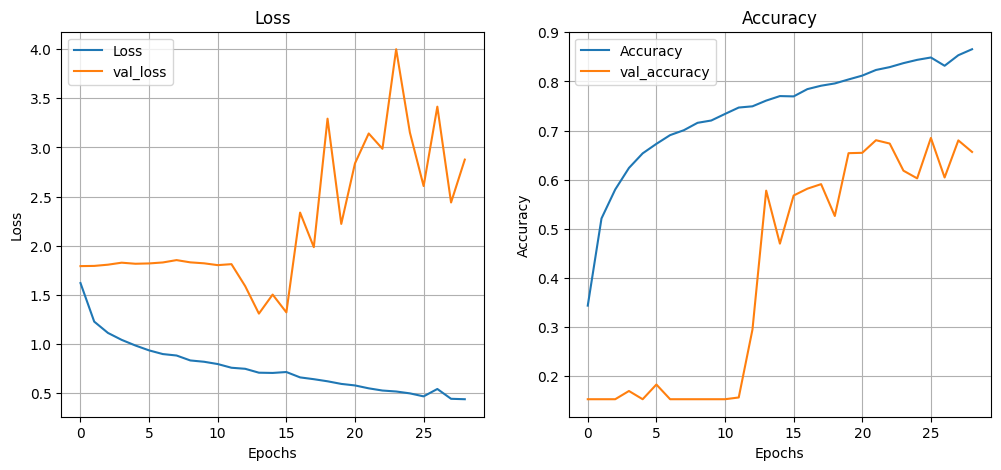

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5711 - loss: 1.3127
Test Loss: 1.3167 Test Accuracy: 0.5717
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step
              precision    recall  f1-score   support

           0       0.40      0.72      0.52       437
           1       0.84      0.75      0.79       474
           2       0.84      0.31      0.46       553
           3       0.78      0.41      0.54       525
           4       0.42      0.88      0.57       510
           5       0.82      0.41      0.55       501

    accuracy                           0.57      3000
   macro avg       0.68      0.58      0.57      3000
weighted avg       0.69      0.57      0.57      3000

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


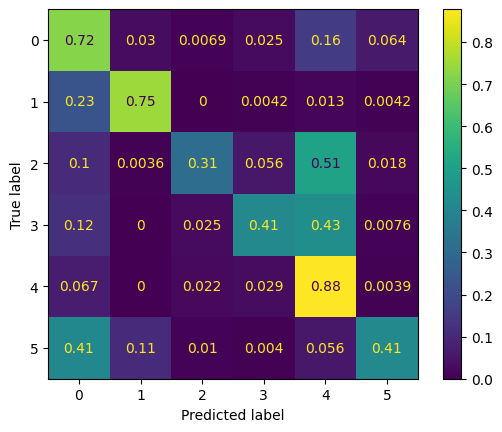

In [12]:
"""Modelo preentrenado haciendo fine tuning"""
model_base = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights= None, pooling='avg')

# model_base.trainable = False

x = layers.Flatten()(model_base.output)
x = layers.Dense(512, activation='relu')(model_base.output)
x = layers.Dropout(0.5)(x)
x = layers.Dense(6, activation='softmax')(x)
model = keras.Model(inputs=model_base.input, outputs=x)

print(model.summary())

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_shuffled, y_train_shuffled, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks = es)

"""Resultados"""
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

loss, accuracy = model.evaluate(X_test_shuffled, y_test_shuffled)
print(f"Test Loss: {loss:.4f}", f"Test Accuracy: {accuracy:.4f}")

print(classification_report(y_test_shuffled, model.predict(X_test_shuffled).argmax(axis = 1)))
predictions = model.predict(X_test_shuffled)
predictions = predictions.argmax(axis = 1)
y_pred = predictions
ConfusionMatrixDisplay.from_predictions(y_test_shuffled, y_pred, normalize = 'true');

El modelo ha obtenido mejores resultados haciendo un fine tuning que haciendo únicamente un transfer learning. Aunque sigue habiendo clases que confunde con otras.